<a href="https://colab.research.google.com/github/juanpablosalas/SalasJuanPablo_RECV_Entrega4/blob/main/SalasJuanPablo_RECV_Entrega4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [331]:
import pandas as pd
import torch
from torch.autograd import Variable # Para convertir nuestras varaibles a tensores
import torch.utils.data as Data

import numpy as np
import matplotlib.pyplot as plt

In [332]:
archivo = '/content/drive/MyDrive/Colab Notebooks/MLP_regresion.csv'

In [333]:
data = pd.read_csv(archivo)
x = np.array(data['X'])
y = np.array(data['Y'])
data.head()

,X,Y
0,-10.00000,0.929135
1,-9.97998,0.634406
2,-9.95996,0.946741
3,-9.93994,0.578634
4,-9.91992,0.721276


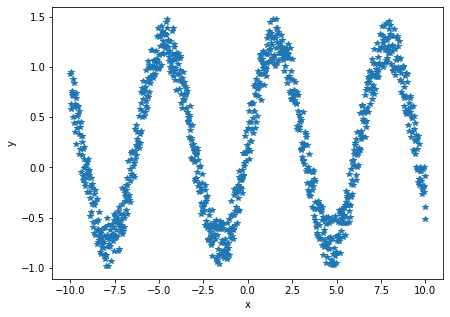

In [334]:
fig = plt.figure(figsize=(7,5))
plt.plot(x,y,'*')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

###**Modelo 1**

In [335]:
X = Variable(torch.from_numpy(x)).float()
X = torch.unsqueeze(X,dim=1)


Y = Variable(torch.from_numpy(y)).float()
Y = torch.unsqueeze(Y,dim=1)

In [336]:
input_dim = 1
model = torch.nn.Sequential(
                torch.nn.Linear(input_dim, 10),
                torch.nn.ReLU(),
                torch.nn.Linear(10, 10),
                torch.nn.ReLU(),
                torch.nn.Linear(10, 10),
                torch.nn.ReLU(),
                torch.nn.Linear(10, input_dim),
                torch.nn.ReLU(),
                )

In [337]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.2)
criterion = torch.nn.MSELoss()

Epoch: [1/1], loss: 0.5515927672386169


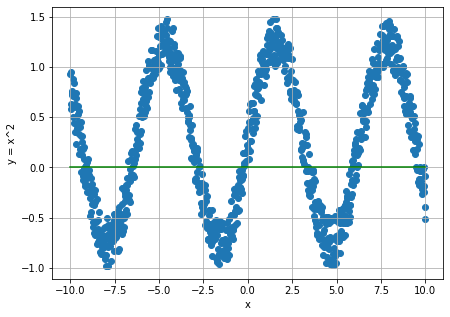

Epoch: [1/51], loss: 0.5515927672386169


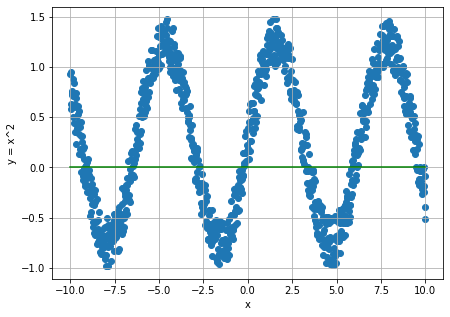

Epoch: [1/101], loss: 0.5515927672386169


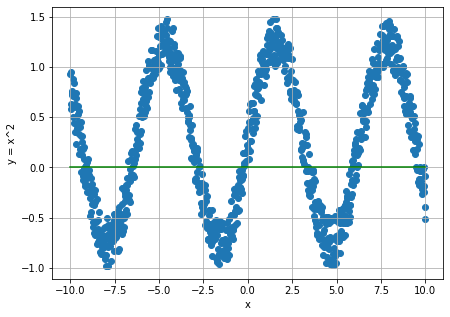

Epoch: [1/151], loss: 0.5515927672386169


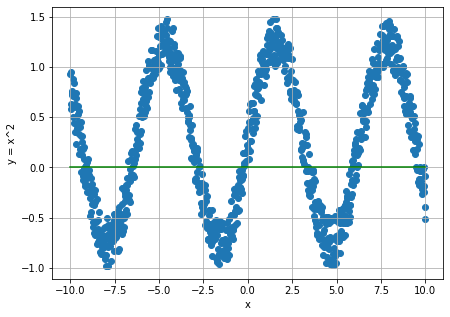

Epoch: [1/201], loss: 0.5515927672386169


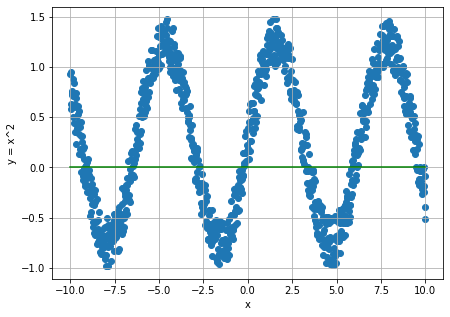

Epoch: [1/251], loss: 0.5515927672386169


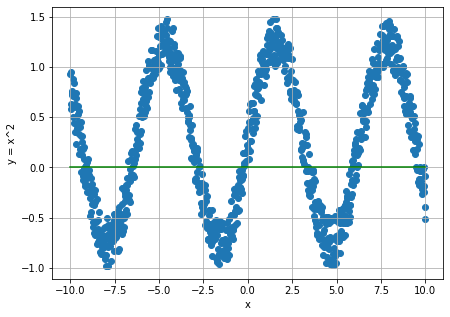

Epoch: [1/301], loss: 0.5515927672386169


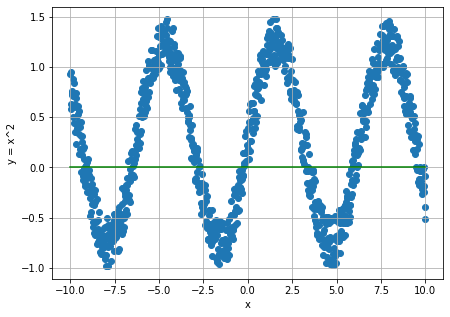

Epoch: [1/351], loss: 0.5515927672386169


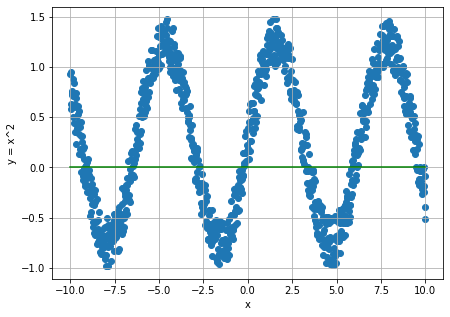

Epoch: [1/401], loss: 0.5515927672386169


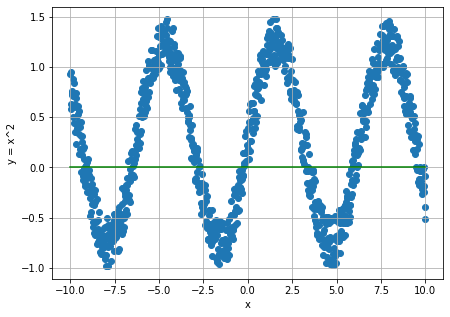

In [338]:
n_epoch = 400
loss_list = []

for epoch in range(n_epoch+1):
  
    Y_pred = model(X)  
    loss = criterion(Y_pred, Y)
    loss_list.append(loss.item())

    optimizer.zero_grad()
    loss.backward()      
    optimizer.step()     
    
    if (epoch%50 == 0):
      print('Epoch: [1/{}], loss: {}'.format(epoch+1,loss.item()))
      fig = plt.figure(figsize=(7,5))
      plt.scatter(X.data.numpy(), Y.data.numpy())
      plt.plot(X.data.numpy(), Y_pred.data.numpy(), 'g-')
      plt.grid()
      plt.xlabel('x')
      plt.ylabel('y = x^2')
      plt.show()

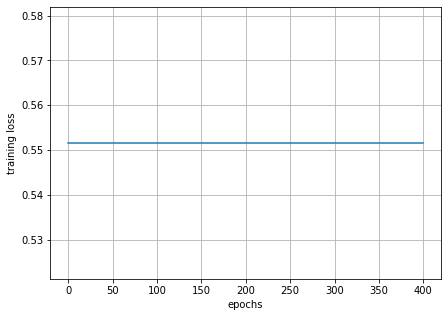

In [339]:
fig = plt.figure(figsize=(7, 5))
plt.plot(loss_list)
plt.ylabel("training loss")
plt.xlabel("epochs")
plt.grid()
plt.show()

###**Modelo 2**

In [340]:
X = Variable(torch.from_numpy(x)).float()
X = torch.unsqueeze(X,dim=1)


Y = Variable(torch.from_numpy(y)).float()
Y = torch.unsqueeze(Y,dim=1)

In [341]:
input_dim = 1
model = torch.nn.Sequential(
                torch.nn.Linear(input_dim, 100),
                torch.nn.ReLU(),
                torch.nn.Linear(100, 100),
                torch.nn.ReLU(),
                torch.nn.Linear(100, input_dim),
                torch.nn.ReLU(),
                )

In [342]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.2)
criterion = torch.nn.MSELoss()

Epoch: [1/1], loss: 0.6281010508537292


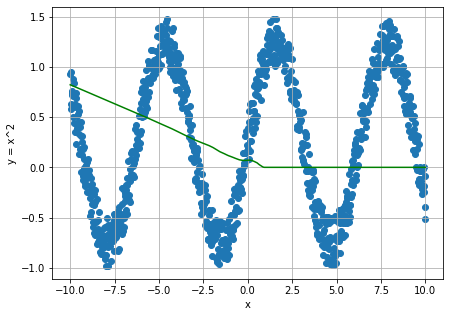

Epoch: [1/51], loss: 0.5515927672386169


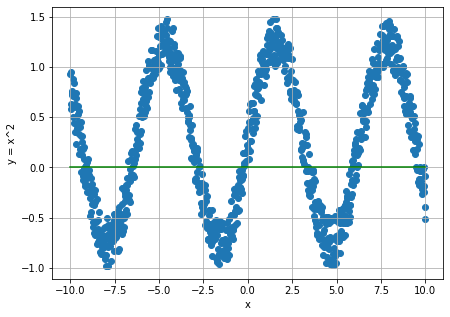

Epoch: [1/101], loss: 0.5515927672386169


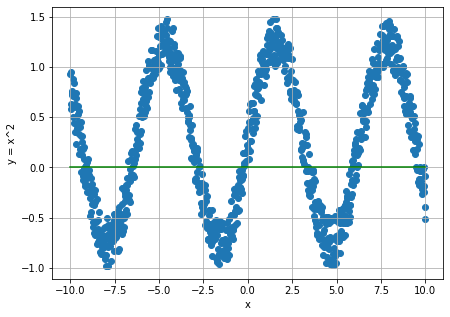

Epoch: [1/151], loss: 0.5515927672386169


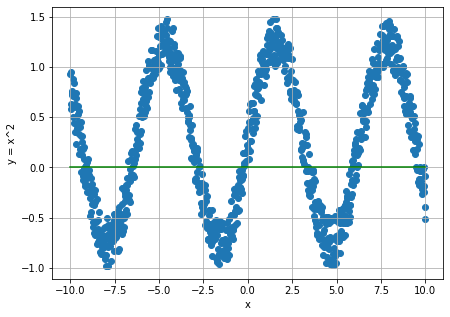

Epoch: [1/201], loss: 0.5515927672386169


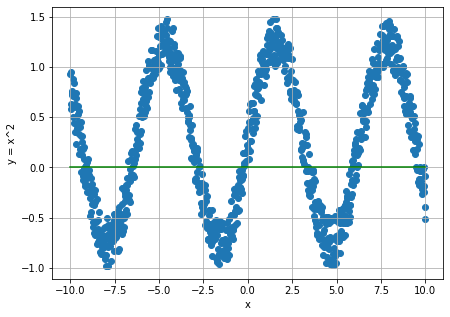

Epoch: [1/251], loss: 0.5515927672386169


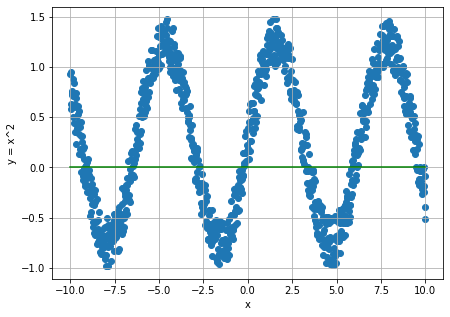

Epoch: [1/301], loss: 0.5515927672386169


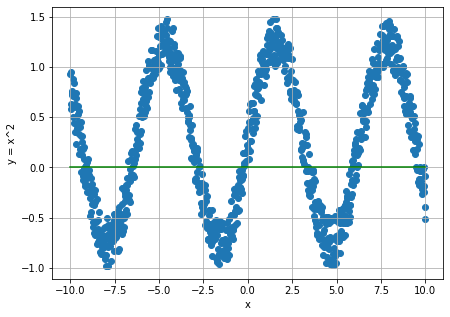

Epoch: [1/351], loss: 0.5515927672386169


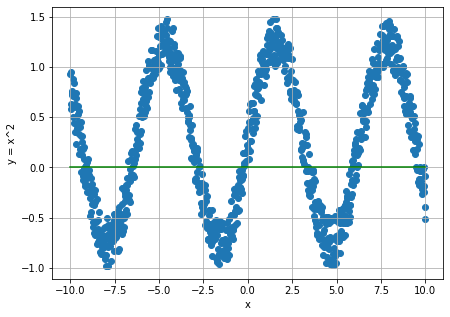

Epoch: [1/401], loss: 0.5515927672386169


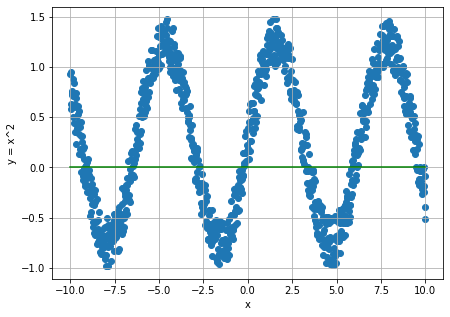

In [343]:
n_epoch = 400
loss_list = []

for epoch in range(n_epoch+1):
  
    Y_pred = model(X)  
    loss = criterion(Y_pred, Y)
    loss_list.append(loss.item())

    optimizer.zero_grad()
    loss.backward()      
    optimizer.step()     
    
    if (epoch%50 == 0):
      print('Epoch: [1/{}], loss: {}'.format(epoch+1,loss.item()))
      fig = plt.figure(figsize=(7,5))
      plt.scatter(X.data.numpy(), Y.data.numpy())
      plt.plot(X.data.numpy(), Y_pred.data.numpy(), 'g-')
      plt.grid()
      plt.xlabel('x')
      plt.ylabel('y = x^2')
      plt.show()

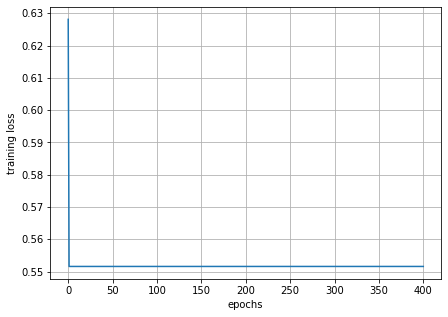

In [344]:
fig = plt.figure(figsize=(7, 5))
plt.plot(loss_list)
plt.ylabel("training loss")
plt.xlabel("epochs")
plt.grid()
plt.show()

Entre los dos modelos, se puede ver que el modelo 1 (que tiene 4 capas de ANN) es mucho más efectivo que el modelo 2 con muchos más neurones (100). Esto mostraría que para este caso, tener más capas reduce más rápido la pérdida que tener más neuronas.